In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("NFLX.csv")
data.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,0,353.859985,365.390015,349.910004,361.989990,361.989990,8005200,2023,2,1
1,1,365.160004,368.320007,358.429993,366.890015,366.890015,7857000,2023,2,2
2,2,359.079987,379.429993,359.000000,365.899994,365.899994,9402000,2023,2,3
3,3,363.640015,368.450012,360.679993,361.480011,361.480011,4994900,2023,2,6
4,4,358.510010,364.179993,354.179993,362.950012,362.950012,6289400,2023,2,7


In [3]:
data = data.drop("Unnamed: 0", axis = 1)

In [4]:
from ydata_profiling import ProfileReport

In [5]:
profile = ProfileReport(data, title = "Netflix Stock Prices")

In [6]:
profile.to_file("netflix.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop("Adj Close", axis = 1)
y = data["Adj Close"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175, 8), (76, 8), (175,), (76,))

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
regressor = RandomForestRegressor()

In [13]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
regressor.score(X_test, y_test)

0.9987044407647974

In [15]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt

In [16]:
grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(2, 20, 2),
          "max_features": [0.5, 1, "sqrt"]}

In [17]:
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                             random_state = 42),
                                             param_distributions = grid,
                                             n_iter = 5,
                                             cv = 5,
                                             verbose = False)
rs_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=False)

In [18]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 16,
 'min_samples_leaf': 2,
 'max_features': 0.5,
 'max_depth': None}

In [19]:
model = RandomForestRegressor(n_estimators = 60, min_samples_split = 16, min_samples_leaf = 2, max_features = 0.5, max_depth = None)

In [20]:
model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=2,
                      min_samples_split=16, n_estimators=60)

In [21]:
model.score(X_test, y_test)

0.9955005452797212

In [22]:
y_preds = model.predict(X_test)
y_preds

array([313.09860194, 487.03592314, 478.59529553, 471.8194218 ,
       380.69004655, 424.58536649, 465.1145401 , 446.59204111,
       362.30766376, 411.90158598, 474.96186403, 446.45537371,
       438.88520814, 484.58943229, 407.60547802, 430.17465651,
       362.11786379, 417.43506062, 342.40410593, 338.44262191,
       333.86752574, 304.47945797, 410.85143579, 432.89967617,
       483.78890645, 319.89132373, 377.29202608, 362.11786379,
       447.16088078, 325.47871797, 444.80283033, 324.44384472,
       339.53922586, 357.80342961, 401.79682733, 399.22532839,
       362.11786379, 484.84210728, 436.75820802, 482.52518138,
       488.0581573 , 324.35696462, 338.52696962, 549.70458643,
       348.30876703, 333.27418972, 309.25108491, 315.257474  ,
       479.83158738, 419.4351362 , 322.31398668, 482.75761578,
       417.89232584, 339.2477434 , 479.91212242, 448.05981944,
       404.55992833, 331.85325843, 485.15720426, 482.52518138,
       439.650907  , 450.40460145, 380.208039  , 304.95

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
plt.scatter(df['Actual'], df['Predicted'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7892\962288868.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [24]:
len(model.feature_importances_)

8

In [25]:
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({"Features": columns,
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending = False)
         .reset_index(drop = True))
    %matplotlib inline
    # Plot DataFrame
    fig,ax = plt.subplots(figsize = (10,6));
    ax.barh(df["Features"][:n], df["feature_importances"][:20]);
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

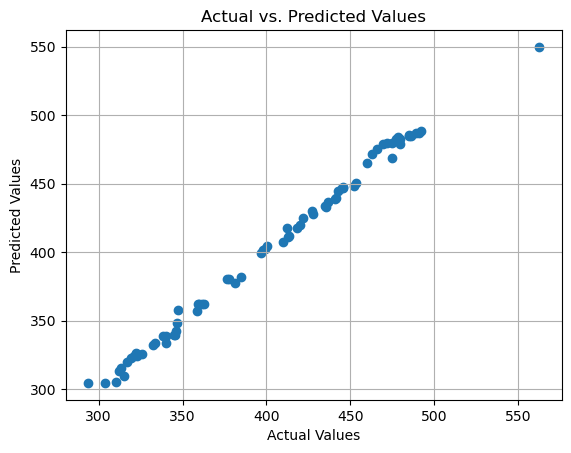

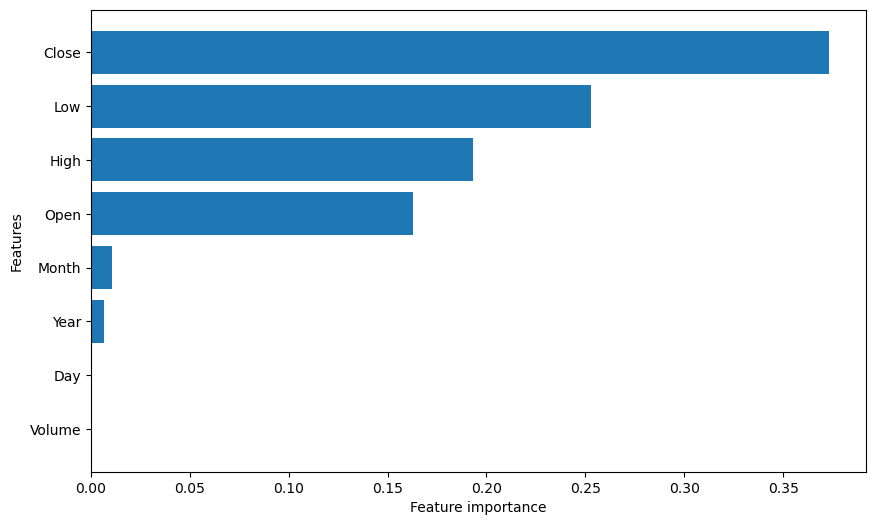

In [26]:
plot_features(X_train.columns, model.feature_importances_)